In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                "marital-status", "occupation", "relationship", "race", "sex", 
                "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

df = pd.read_csv("adult.data.txt", header=None, names=column_names, sep=", ")

columns_with_missing_values = ["workclass", "education", "marital-status", 
                                "occupation", "relationship", "race", 
                                "sex", "native-country"]

for column in columns_with_missing_values:
    df = df[df[column] != '?']

# Filter data for analysis
above = df[df["class"] == ">50K"]
below = df[df["class"] == "<=50K"]

#df.head()

/var/folders/nt/hysh7_415xg1hjw0r3zxqf2w0000gn/T/ipykernel_77640/1962552303.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("adult.data.txt", header=None, names=column_names, sep=", ")


In [2]:
def analyze_numerical_data(column):
    above_val = list(above[column])
    below_val = list(below[column])
    
    print(column)
    print()
    print("Mean")
    print("Above 50K = " + str(np.mean(above_val)))
    print("Below 50K = " + str(np.mean(below_val)))
    print()
    print("Median")
    print("Above 50K = " + str(np.median(above_val)))
    print("Below 50K = " + str(np.median(below_val)))
    print()
    print("Standard Deviation")
    print("Above 50K = " + str(np.std(above_val)))
    print("Below 50K = " + str(np.std(below_val)))

    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    axes[0, 0].boxplot(above_val)
    axes[0, 0].set_title(">50K")
    axes[0, 0].set_xlabel(column)
    
    axes[0, 1].boxplot(below_val)
    axes[0, 1].set_title("<=50K")
    axes[0, 1].set_xlabel(column)
    
    axes[1, 0].hist(above_val)
    axes[1, 0].set_title(">50K")
    axes[1, 0].set_xlabel(column)
    
    axes[1, 1].hist(below_val)
    axes[1, 1].set_title("<=50K")
    axes[1, 1].set_xlabel(column)
    
    plt.show()
    

def analyze_categorical_data(column):
    above_val = Counter(above[column])
    below_val = Counter(below[column])

    print(column)
    print()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5,8))
    axes[0].pie(above_val.values(), labels=above_val.keys(), autopct='%1.0f%%')
    axes[0].set_title(">50K")

    axes[1].pie(below_val.values(), labels=below_val.keys(), autopct='%1.0f%%')
    axes[1].set_title("<=50K")
    
    plt.show()
    
def analyze_per_unique_value(column):
    unique_values = df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5,8))

    for i, val in enumerate(unique_values):
        val_df = df[df[column] == val]
        above_val = val_df[val_df["class"] == ">50K"]
        below_val = val_df[val_df["class"] == "<=50K"]
        axes[i].pie([len(below_val.index), len(above_val.index)], labels=["<=50K (Count-" + str(len(below_val.index)) + ")", ">50K (Count-" + str(len(above_val.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    
    plt.show() 

sex



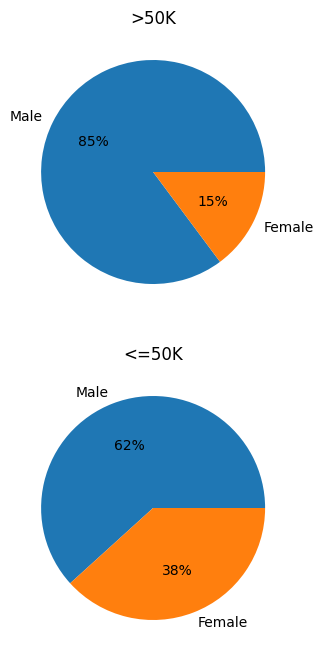

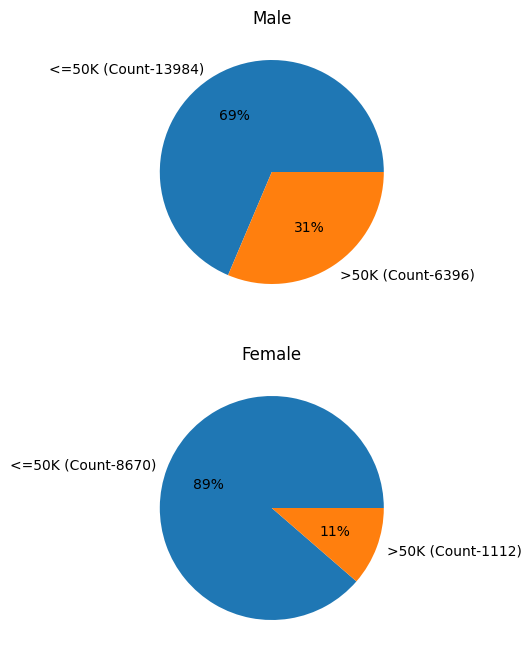

In [3]:
analyze_categorical_data("sex")
print()
analyze_per_unique_value("sex")

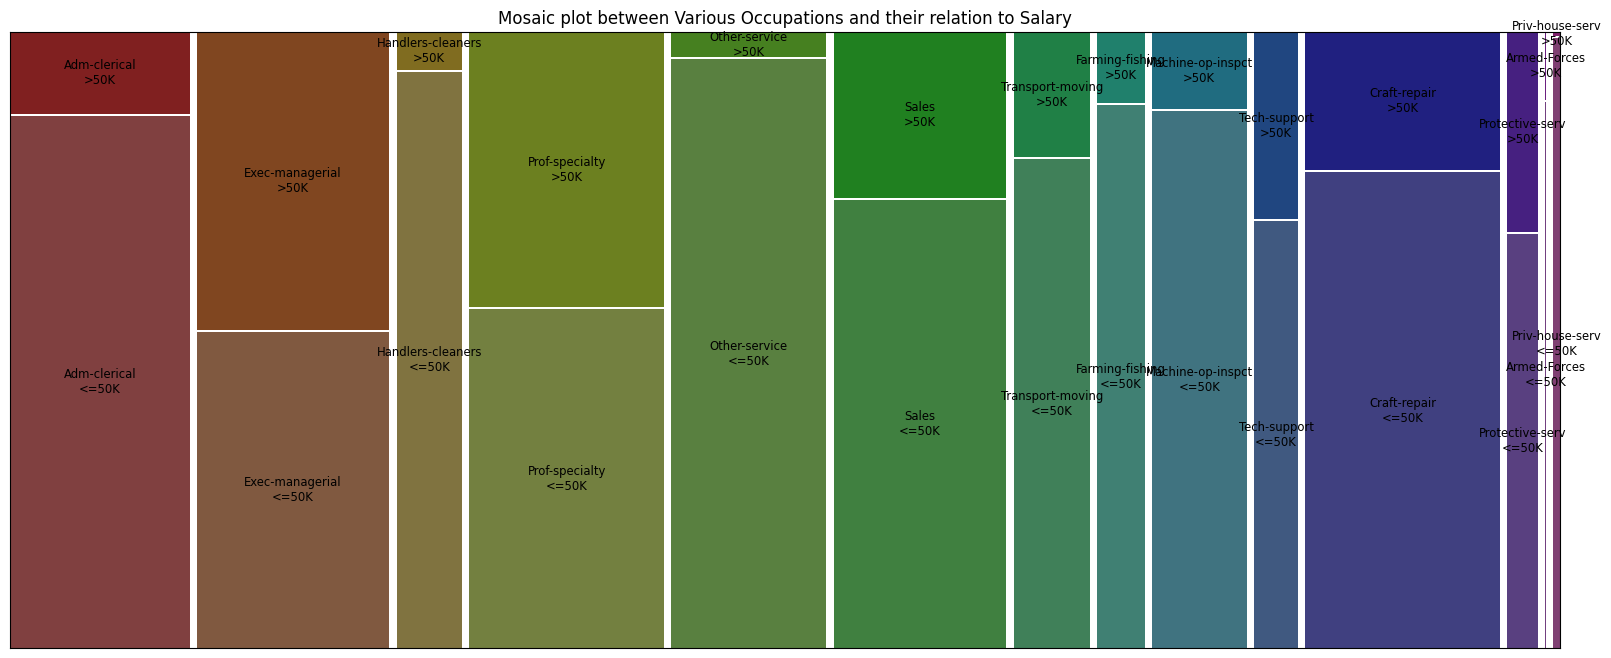

In [4]:
from statsmodels.graphics.mosaicplot import mosaic

plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['occupation', 'class'], ax=axes, axes_label=False)
plt.title('Mosaic plot between Various Occupations and their relation to Salary')
plt.show()

In [5]:
def plot_scatter_plot_diff(column1, column2, column3, df):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10, 10))

    columns = [column1, column2, column3]

    print("Blue <=50K, Yellow >50K")
    for i, (x_col, y_col) in enumerate([(column1, column2), (column2, column3), (column3, column1)]):
        x = df[x_col]
        y = df[y_col]
        colors = df['class'].map({'<=50K': 'blue', '>50K': 'yellow'})
    
        axes[i].scatter(x, y, c=colors)
        axes[i].set_title(f"{x_col} vs {y_col}")
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)

    plt.tight_layout()
    plt.show()

Blue <=50K, Yellow >50K


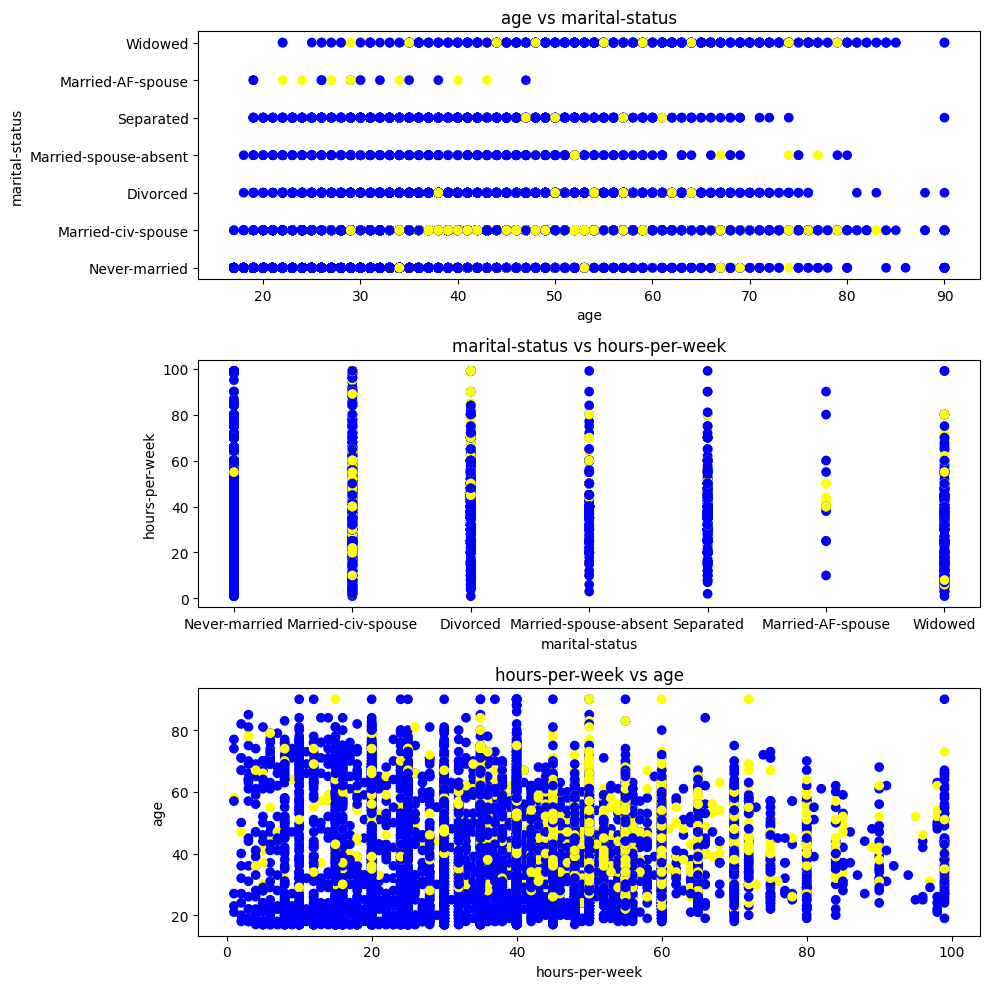

In [6]:
plot_scatter_plot_diff("age", "marital-status", "hours-per-week", df)

capital-gain

Mean
Above 50K = 3937.6798082045816
Below 50K = 148.8938377328507

Median
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation
Above 50K = 14385.101938325177
Below 50K = 936.3716120599768


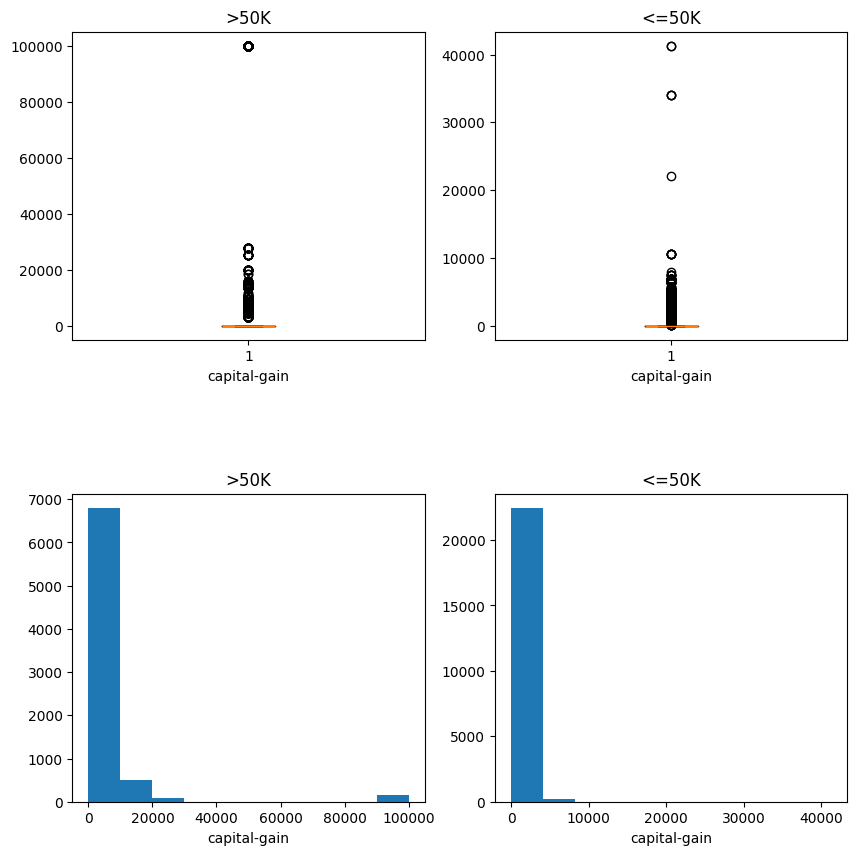

In [7]:
analyze_numerical_data("capital-gain")

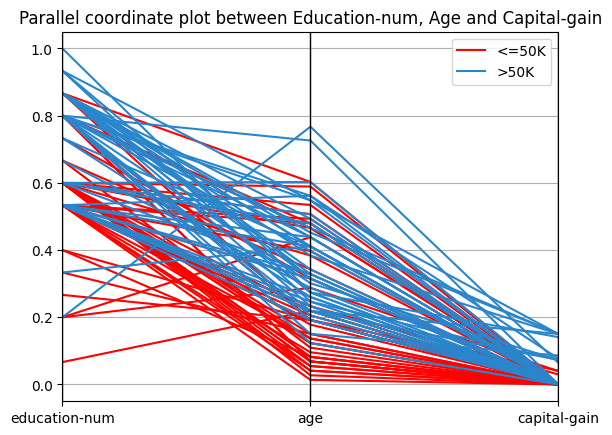

In [8]:
from sklearn.preprocessing import MinMaxScaler

frame_pc = df[['education-num', 'age', 'capital-gain', 'class']].copy()
scaler = MinMaxScaler()
frame_pc[['education-num', 'age', 'capital-gain']] = scaler.fit_transform(frame_pc[['education-num', 'age', 'capital-gain']])


frame_pc_below_50K = frame_pc[frame_pc["class"] == "<=50K"].sample(n=50, random_state=42)
frame_pc_above_50K = frame_pc[frame_pc["class"] == ">50K"].sample(n=50, random_state=42)
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])


pd.plotting.parallel_coordinates(frame_pc, 'class', cols=['education-num', 'age', 'capital-gain'], color=('#FF0000', '#2986CC'))
plt.title('Parallel coordinate plot between Education-num, Age and Capital-gain')
plt.show()

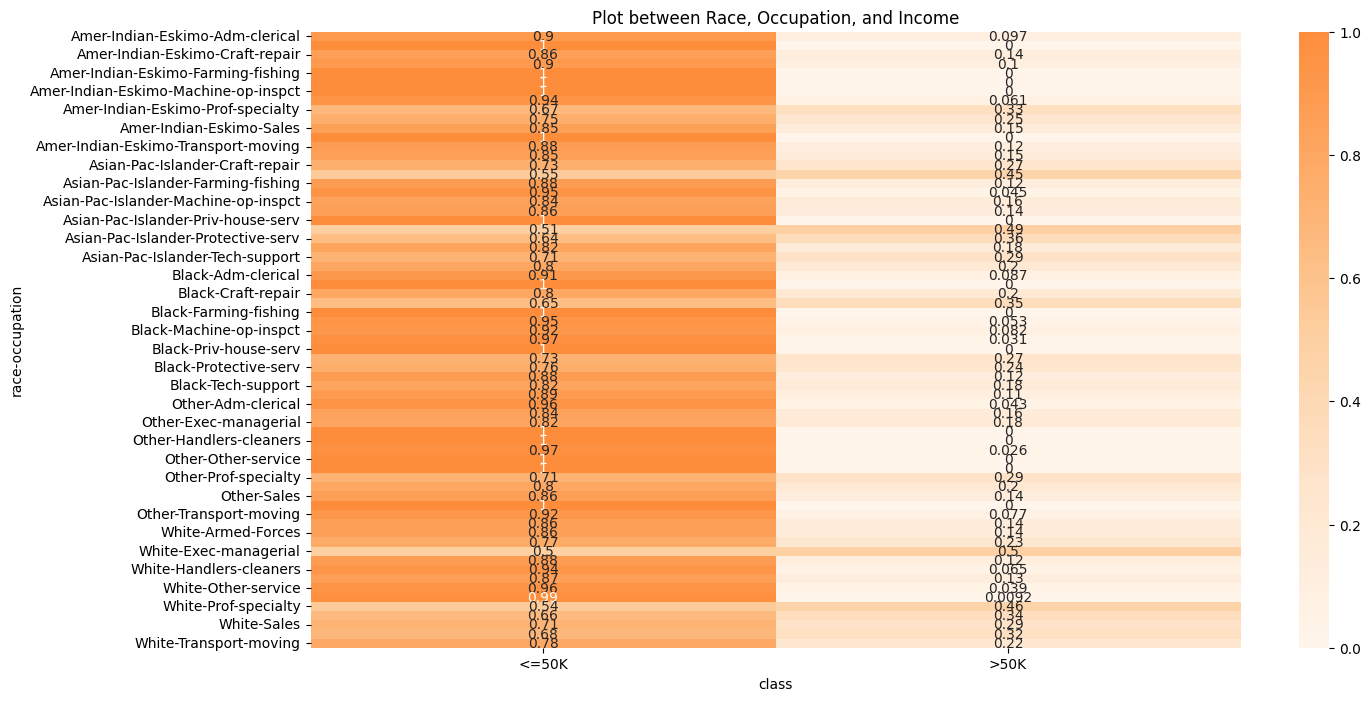

In [9]:
import seaborn as sns

plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
fig.subplots_adjust(hspace=.5)

heatmap = sns.heatmap(pd.crosstab(index=[df['race'], df['occupation']], columns=df['class'], normalize='index'), annot=True, cmap="Oranges", ax=axes, center=True)
plt.title('Plot between Race, Occupation, and Income')
plt.show()


